In [3]:
import sys
sys.path.append('../../')

from os import listdir

from hdf5storage import loadmat, savemat 
import numpy as np 
from matplotlib import pyplot as plt

from scipy import signal 
from hnlpy.timeop import makefiltersos
from hnlpy.timeop import narrowfilter 
from scipy.signal import sosfiltfilt
from scipy.signal import hilbert
from scipy.signal import savgol_filter

from numpy.polynomial.polynomial import polyfit, polyval

Try comparing sampling rate of 200 and 125 in one session and comparing DFA 5/5 vs 20/20

In [4]:
# load Hurst from 20/20 DFA 
# General: a single model for all
outdict = loadmat('Hurst_eeg_20_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        


In [6]:
eeg_Hurst_20=eeg_Hurst

In [7]:
  # load Hurst 125
# General: a single model for all
outdict = loadmat('Hurst_eeg_125_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        

In [8]:
eeg_Hurst_125=eeg_Hurst

In [9]:
  # load Hurst 200
# General: a single model for all
outdict = loadmat('Hurst_eeg_125_20220713.mat')
eeg_Hurst           = outdict['eeg_Hurst']        
new_sr              = outdict['new_sr']           
passbands           = outdict['passbands']        
stopbands           = outdict['stopbands']        
band_labels         = outdict['band_labels']      
filename            = outdict['filename']         
condition_index     = outdict['condition_index']  
condition_names     = outdict['condition_names']  
channels            = outdict['channels']         
channel_labels      = outdict['channel_labels']   
intervals           = outdict['intervals']        
samples             = outdict['samples']          
sessionTypes        = outdict['sessionTypes']     
session             = outdict['session']        

In [ ]:
eeg_Hurst_200=eeg_Hurst

In [29]:
# compare Hurst 200 5/5 and Hurst 125 5/5
mean_H_200_5=np.zeros((4,2,7,32))
mean_H_125_5=np.zeros((4,2,7,32))
for condi in range(4):
    for subj in range(2):
        mean_H_200_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_200[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)
        mean_H_125_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_125[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)

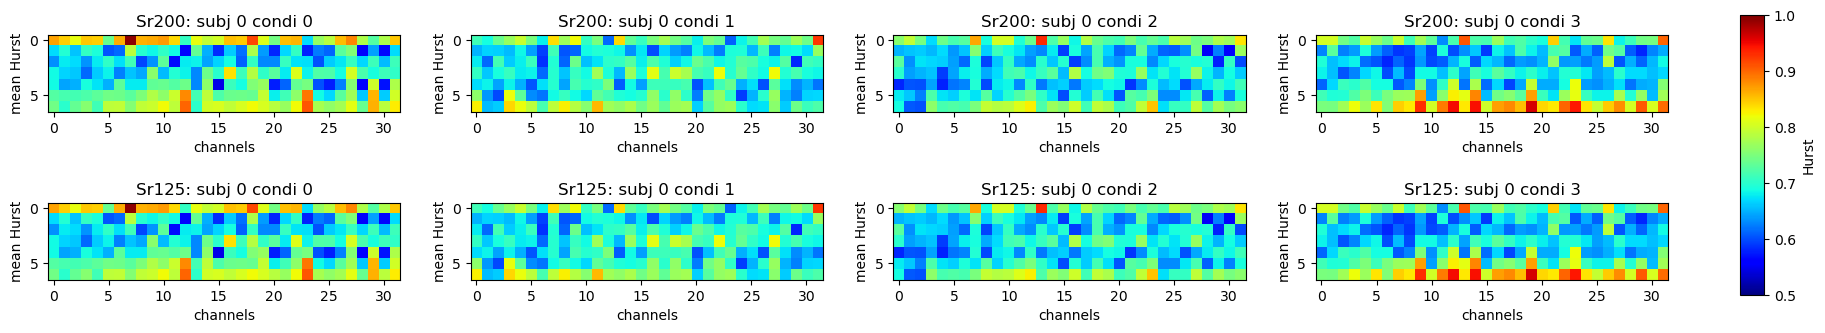

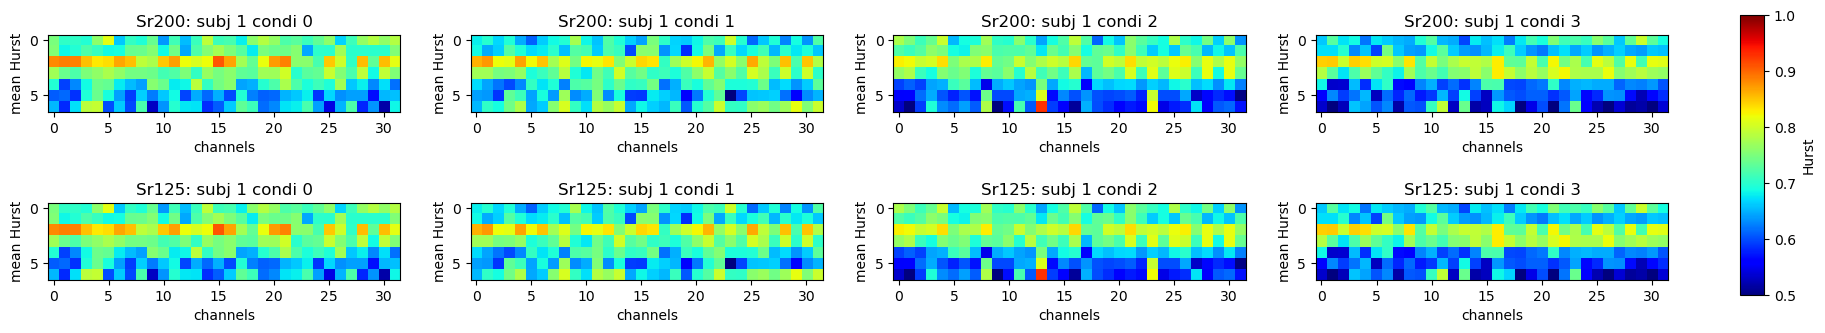

In [45]:
# plot the comparison
for subj in range(2):
    fig, ax = plt.subplots(2,4,figsize=(6*4, 4))
    for condi in range(4):
        compare1=plt.sca(ax[0,condi])
        plt.imshow(mean_H_200_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap=plt.cm.jet)
        plt.xlabel('channels'); plt.ylabel('mean Hurst')
        plt.title('Sr200: subj '+str(subj)+' condi '+str(condi))
        plt.sca(ax[1,condi])
        compare2=plt.imshow(mean_H_125_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap=plt.cm.jet)
        plt.xlabel('channels'); plt.ylabel('mean Hurst')
        plt.title('Sr125: subj '+str(subj)+' condi '+str(condi))
        
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])

    cbar_node=fig.colorbar(compare2,cbar_ax)
    cbar_node.ax.tick_params(labelsize=10)
    cbar_node.set_label('Hurst')


In [37]:
# compare Hurst 200 5/5 and Hurst 200 20/20
mean_H_200_5=np.zeros((4,2,7,32))
mean_H_200_20=np.zeros((4,2,7,32))
for condi in range(4):
    for subj in range(2):
        mean_H_200_5[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_200[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)
        mean_H_200_20[condi,subj,:,:]=np.mean(np.squeeze(eeg_Hurst_20[np.where(np.array(condition_index)==condi),subj,:,:]),axis=0)

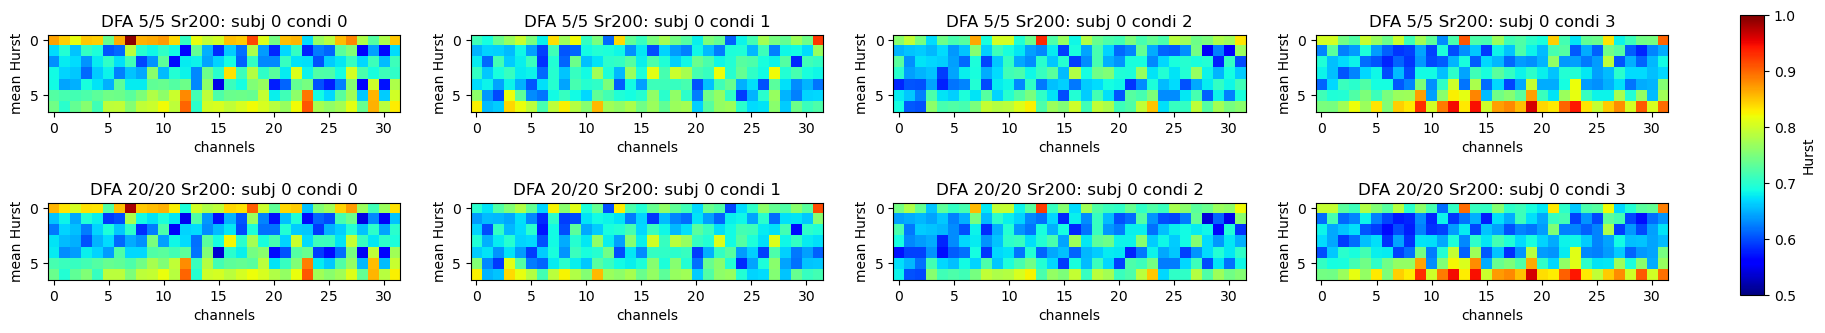

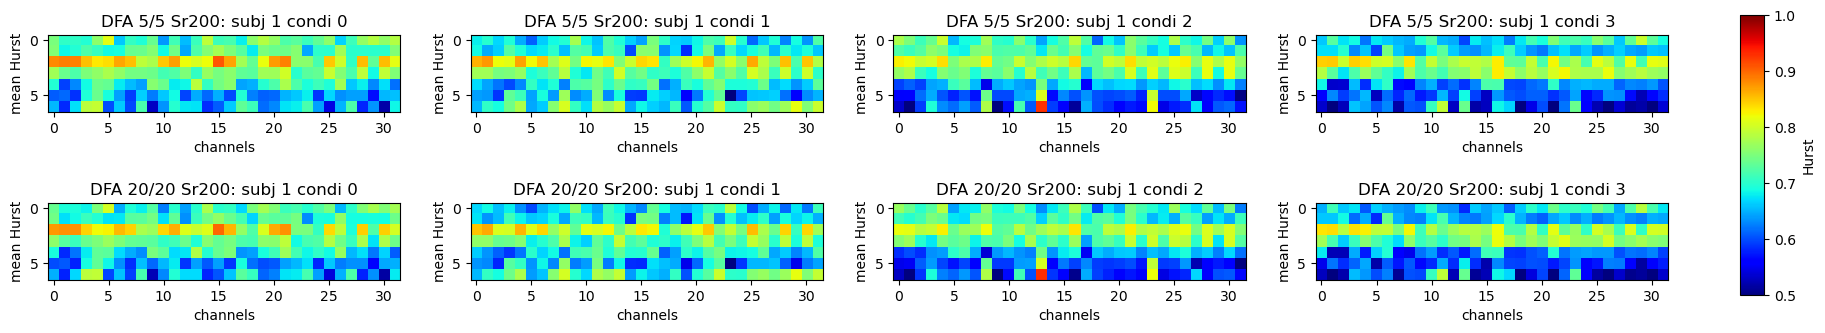

In [46]:
# plot the comparison
for subj in range(2):
    fig, ax = plt.subplots(2,4,figsize=(6*4, 4))
    for condi in range(4):
        plt.sca(ax[0,condi])
        plt.imshow(mean_H_200_5[condi,subj,:,:],vmin=0.5,vmax=1,cmap='jet')
        plt.xlabel('channels'); plt.ylabel('mean Hurst')
        plt.title('DFA 5/5 Sr200: subj '+str(subj)+' condi '+str(condi))
        plt.sca(ax[1,condi])
        compare2=plt.imshow(mean_H_200_20[condi,subj,:,:],vmin=0.5,vmax=1,cmap='jet')
        plt.xlabel('channels'); plt.ylabel('mean Hurst')
        plt.title('DFA 20/20 Sr200: subj '+str(subj)+' condi '+str(condi))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])

    cbar_node=fig.colorbar(compare2,cbar_ax)
    cbar_node.ax.tick_params(labelsize=10)
    cbar_node.set_label('Hurst')

Comparing with time sequence and state index in 12 sessions

In [1]:
# organize file in time sequence
# filedir="../../"
# pathname = 'Cleaned_data/'
filedates=[20220713,20220721,20220804,20220808,20220810,20220811,20220815,20220816,20221003,2022100401,2022100402,20221005]
numSes=len(filedates)

In [4]:
# test in one file
ses=1
outdict = loadmat('Hurst_eeg_20_'+str(filedates[ses])+'.mat')
eeg_Hurst           = outdict['eeg_Hurst']          # 12x2x7x32
new_sr              = outdict['new_sr']             
passbands           = outdict['passbands']          
stopbands           = outdict['stopbands']          
band_labels         = outdict['band_labels']        
filename            = outdict['filename']           
condition_index     = outdict['condition_index']    # 12
condition_names     = outdict['condition_names']    
channels            = outdict['channels']           
channel_labels      = outdict['channel_labels']     
intervals           = outdict['intervals']          # 12x175x2
samples             = outdict['samples']            # 12x175x2
sessionTypes        = outdict['sessionTypes']       
session             = outdict['session']            # 12

In [21]:
# put everything in 144 first dimenstion 
eeg_Hurst144x2       =np.zeros((144,2,7,32))
condition_index144   =np.zeros((144))
intervals144         =dict()
samples144           =dict()
session144           =np.zeros((144))
n=0
for ses in range(12):
    outdict = loadmat('Hurst_eeg_20_'+str(filedates[ses])+'.mat')
    eeg_Hurst           = outdict['eeg_Hurst']          # 12x2x7x32
    condition_index     = outdict['condition_index']    # 12
    intervals           = outdict['intervals']          # 12x175x2
    samples             = outdict['samples']            # 12x175x2
    session             = outdict['session']            # 12
    for trl in range(12):
        condition_index144[n]     = condition_index[trl]    # 12
        intervals144[str(n)]           = intervals[trl]
        samples144[str(n)]             = samples[trl]
        session144[n]             = session[trl]
        for subj in range(2):
            eeg_Hurst144x2[n,subj]       = eeg_Hurst[trl,subj,:,:]
        n+=1

outdict = dict()
outdict['eeg_Hurst144x2']       = eeg_Hurst144x2
outdict['condition_index144']   = condition_index144
outdict['intervals144']         = intervals144
outdict['samples144']           = samples144
outdict['session144']           = session144
savemat('Hurst_eeg144',outdict,store_python_metadata = True) 


In [10]:
# test in one file 
ses=1
outdict = loadmat('Corr_eeg_200_'+str(filedates[ses])+'.mat')

eeg_empirical_correlation   =outdict['eeg_empirical_correlation']   # 12X2X7X32X32
eeg_partial_correlation     =outdict['eeg_partial_correlation']     # 12X2X7X32X32
new_sr                      =outdict['new_sr']                      
passbands                   =outdict['passbands']                   
stopbands                   =outdict['stopbands']                   
band_labels                 =outdict['band_labels']                 
filename                    =outdict['filename']                    
condition_index             =outdict['condition_index']             # 12
condition_names             =outdict['condition_names']             
channels                    =outdict['channels']                    
channel_labels              =outdict['channel_labels']              
intervals                   =outdict['intervals']                   # 12x175x2
samples                     =outdict['samples']                     # 12x175x2
sessionTypes                =outdict['sessionTypes']
session                     =outdict['session']                     # 12



organize behaviral H into 144 x 2